# **CNN : Classifying Flower Images Using Transfer Learning with MobileNetV2 Architecture**

Project Created by : **Maulana Zulfikar Aziz**

E-mail : maulanazulfikarrz@gmail.com

## **Project Overview**

Bunga merupakan salah satu bagian dari tanaman yang berupa modifikasi suatu tunas (batang dan daun) dimana bentuk, warna, dan susunannya disesuaikan dengan kepentingan tumbuhan, salah satu fungsinya yaitu sebagai tempat terjadinya peristiwa penyerbukan dan pembuahan yang nantinya akan menghasilkan buah [1].

Saat kita berada di lingkungan yang penuh dengan pepohonan dan tanaman, seringkali kita melihat suatu bunga akan tetapi kita tidak mengetahui nama dari bunga tersebut. Salah satu cara untuk menyelesaikan permasalahan ini adalah dengan membuat suatu model Machine Learning yang bisa digunakan untuk mengklasifikasikan nama bunga berdasarkan bentuknya yang nantinya bisa di-deploy ke dalam suatu device.

Dalam project ini, saya menggunakan metode Transfer Learning dengan arsitektur MobileNetV2 untuk menyelesaikan permasalahan klasifikasi 14 jenis bunga.

## **Project Understanding**

### Problem Statement (Pernyataan Masalah)

Kadangkala saat kita berjalan di taman atau lingkungan yang penuh dengan tanaman, kita penasaran dengan nama bunga dari suatu tanaman yang ada di lingkungan tersebut. Lalu, bagaimana cara untuk mengetahui nama bunga tersebut berdasarkan bentuknya?

### Goals (Tujuan)

Membuat sebuah model Convolutional Neural Network dengan metode Transfer Learning menggunakan arsitektur MobileNetV2 untuk menyelesaikan permasalahan klasifikasi 14 jenis bunga.

### Solution Approaches

Untuk membuat sebuah model Convolutional Neural Network dengan bantuan metode Transfer Learning menggunakan arsitektur MobileNetV2, kita perlu melakukan beberapa tahapan, yaitu :    

1. Data Understanding

   Tahapan ini mencakup penjelasan awal tentang data, data loading, data exploration, dan data visualization

2. Data Preparation

   Sebelum melalui tahap pemodelan, data perlu disiapkan terlebih dahulu. Persiapan yang perlu dilakukan adalah normalisasi nilai pixel pada gambar agar berada di rentang 0 sampai 1.

3. Modelling & Result

   Pada tahap ini, kita membuat sebuah model CNN dengan metode Transfer Learning menggunakan arsitektur MobileNetV2 lalu kita fit dengan menggunakan data train yang telah kita prepare sebelumnya.

4. Evaluation

   Model dievaluasi dengan menggunakan data test untuk mengetahui performa model jika diterapkan terhadap data yang belum pernah dilihat oleh model.

5. Save the Model

   Model yang telah dibuat, disimpan dengan format TF-Lite agar nantinya bisa digunakan untuk proses deployment ke mobile device.

## **Data Understanding**

### About Data

Data yang digunakan pada project ini merupakan data kumpulan 14 jenis gambar bunga yang dapat diunduh di : https://www.kaggle.com/datasets/amananandrai/ag-news-classification-dataset

Data ini mencakup 2 folder, yaitu `train` dan `val`. Total gambar yang dapat digunakan untuk proses training adalah 13618 buah gambar dengan total gambar validasi sebesar 98 buah gambar.

Adapun jenis-jenis bunga dalam data ini mencakup : carnation, iris, bluebells, golden english, roses, fallen nephews, tulips, marigolds, dandelions, chrysanthemums, black-eyed daisies, water lilies, sunflowers, dan daisies.

### Import Libraries

In [1]:
import zipfile, os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout, MaxPooling2D, Conv2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import tensorflow as tf
import pathlib

### Data Loading

Untuk mempermudah eksekusi di device lain, data telah diupload terlebih dahulu di Google Drive, dan akan diupload dalam notebook ini melalui link Google Drive.

In [2]:
!pip install --upgrade --no-cache-dir gdown

! gdown --id 1hblAwCfA9VWPr4VMj-tlOLvXdau8Lrrf

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1hblAwCfA9VWPr4VMj-tlOLvXdau8Lrrf
From (redirected): https://drive.google.com/uc?id=1hblAwCfA9VWPr4VMj-tlOLvXdau8Lrrf&confirm=t&uuid=780e2e4d-26fb-48d2-8092-b7af0a34a8ad
To: /content/Flower_Classification.zip
100% 215M/215M [00:03<00:00, 60.3MB/s]


In [3]:
# Unzip dataset
files = "Flower_Classification.zip"
zip_ref = zipfile.ZipFile(files,'r')
zip_ref.extractall('dataset/')
zip_ref.close()

### Data Exploration

In [4]:
# Melihat jumlah kelas dalam data train
contents = os.listdir("dataset/train")
contents = [item for item in contents if os.path.isdir(os.path.join("dataset/train", item))]
print("Jumlah kelas : ",len(contents))
contents

Jumlah kelas :  14


['coreopsis',
 'carnation',
 'iris',
 'astilbe',
 'sunflower',
 'dandelion',
 'calendula',
 'bellflower',
 'rose',
 'tulip',
 'black_eyed_susan',
 'common_daisy',
 'california_poppy',
 'water_lily']

In [5]:
# Melihat total gambar pada data train
total = 0
for label in os.listdir('dataset/train') :
  if not label.endswith(".txt") :
    jumlah = len(os.listdir(f"dataset/train/{label}"))
    total += jumlah
    print("Total gambar {} = {}".format(label,jumlah))
print("\n")
print("Total gambar train keseluruhan = {}".format(total))

Total gambar coreopsis = 1035
Total gambar carnation = 924
Total gambar iris = 1041
Total gambar astilbe = 726
Total gambar sunflower = 1013
Total gambar dandelion = 1038
Total gambar calendula = 1011
Total gambar bellflower = 872
Total gambar rose = 986
Total gambar tulip = 1034
Total gambar black_eyed_susan = 986
Total gambar common_daisy = 978
Total gambar california_poppy = 1021
Total gambar water_lily = 977


Total gambar train keseluruhan = 13642


In [6]:
# Melihat total gambar pada data validation
total = 0
for label in os.listdir('dataset/val') :
  if not label.endswith(".txt") :
    jumlah = len(os.listdir(f"dataset/val/{label}"))
    total += jumlah
    print("Total gambar {} = {}".format(label,jumlah))
print("\n")
print("Total gambar validation keseluruhan = {}".format(total))

Total gambar coreopsis = 7
Total gambar carnation = 7
Total gambar iris = 7
Total gambar astilbe = 7
Total gambar sunflower = 7
Total gambar dandelion = 7
Total gambar calendula = 7
Total gambar bellflower = 7
Total gambar rose = 7
Total gambar tulip = 7
Total gambar black_eyed_susan = 7
Total gambar common_daisy = 7
Total gambar california_poppy = 7
Total gambar water_lily = 7


Total gambar validation keseluruhan = 98


### Data Visualization

Dimensi Gambar =  (256, 256)


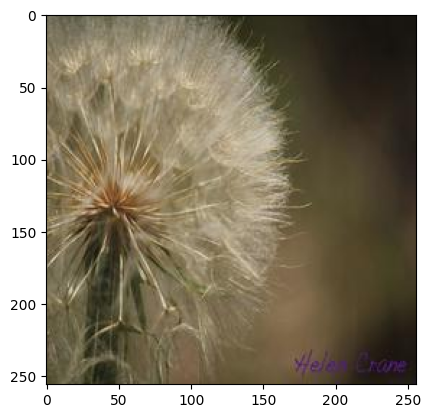

In [7]:
# Melihat dimensi gambar
list_img = os.listdir('dataset/train/dandelion')
img_dir = random.choice(list_img)
img = image.load_img("dataset/train/dandelion/{}".format(img_dir))
img_dim = Image.open("dataset/train/sunflower/3779833278_de4aebebcb_c.jpg")
print("Dimensi Gambar = ",img_dim.size)
imgs = plt.imshow(img)

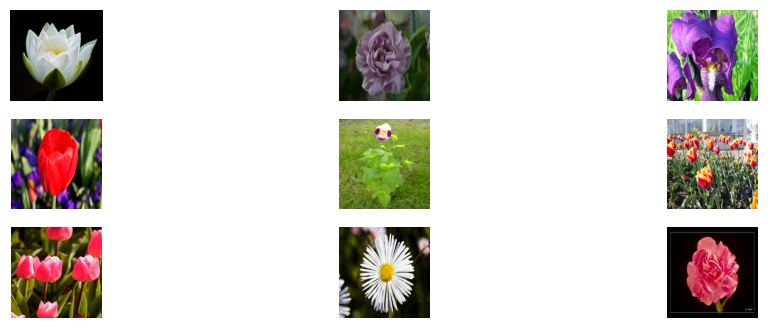

In [8]:
# Melihat bentuk gambar
plt.figure(figsize=(12, 4))

for i in range(1,10) :
  plt.subplot(3,3,i)
  flower_type = random.choice(contents)
  img_dir = random.choice(os.listdir("dataset/train/{}/".format(flower_type)))
  img = mpimg.imread("dataset/train/{}/{}".format(flower_type,img_dir))
  plt.imshow(img)
  plt.axis('off')

plt.show()

Terlihat bahwa gambar-gambar pada direktori train memiliki resolusi dan sudut pemotretan yang berbeda-beda. Oleh karena itu, pada tahap **Data Preparation** tidak akan dilakukan proses data augmentation dengan mengubah-ubah bentuk dari gambar.

## **Data Preparation**

In [9]:
# Membuat data generator
train_gen = ImageDataGenerator(
    rescale=1./255,

)

val_gen = ImageDataGenerator(
rescale=1./255,
)

In [10]:
# Data Preprocessing

train_dir = "dataset/train"
val_dir = "dataset/val"

train_generator = train_gen.flow_from_directory(
    train_dir,
    target_size=(224,224), # Menyesuaikan MobileNetV2
    batch_size=32,
    class_mode="categorical"
)

validation_generator = val_gen.flow_from_directory(
val_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical"
)

Found 13642 images belonging to 14 classes.
Found 98 images belonging to 14 classes.


## **Modelling**

MobileNetV2 merupakan salah satu arsitektur CNN yang memiliki performa baik di mobile device. MobileNetV2 berbasis pada struktur residual terbalik dimana koneksi residual berada di antara lapisan-lapisan bottleneck. Lapisan ekspansi intermediate menggunakan konvolusi depthwise ringan untuk menyaring fitur sebagai sumber non-linieritas. Secara keseluruhan, arsitektur MobileNetV2 berisi lapisan initial fully convolutional layer dengan 32 filter, diikuti oleh 19 lapisan bottleneck residual. [2]

In [11]:
# Membuat arsitektur model CNN dengan metode Transfer Learning menggunakan MobileNetV2

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
base_model,
    GlobalAveragePooling2D(),
    BatchNormalization(),
    Dropout(0.5),
    Dense(512,activation="relu"),
    Dropout(0.2),
    Dense(256,activation="relu"),
    Dropout(0.3),
    Dense(14,activation="softmax")
]
)

9406464/9406464 [==============================] - 1s 0us/step


In [12]:
# Melihat summary dari model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 batch_normalization (Batch  (None, 1280)              5120      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                        

In [14]:
# Mendefinisikan Callbacks

checkpoint = ModelCheckpoint(
    "best_model.h5",
    monitor="val_loss",
    save_best_only=True,
    mode="min",
    verbose=1
)


early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=6,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.2,
    patience=3,
    min_delta=0.0001,
    mode="min",
    verbose=1
)

In [15]:
# Compile model
model.compile(
    loss="categorical_crossentropy",
    optimizer = "adam",
    metrics=["accuracy"]
)

In [16]:
# Train model

history = model.fit(
    train_generator,
    epochs=100,
    steps_per_epoch = len(train_generator),
    validation_data = validation_generator,
    validation_steps = len(validation_generator),
    callbacks = [checkpoint, early_stopping,reduce_lr],
    verbose=2
)

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.43903, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


427/427 - 38s - loss: 0.8616 - accuracy: 0.7307 - val_loss: 0.4390 - val_accuracy: 0.8265 - lr: 0.0010 - 38s/epoch - 88ms/step
Epoch 2/100

Epoch 2: val_loss improved from 0.43903 to 0.37777, saving model to best_model.h5
427/427 - 27s - loss: 0.5389 - accuracy: 0.8299 - val_loss: 0.3778 - val_accuracy: 0.8878 - lr: 0.0010 - 27s/epoch - 63ms/step
Epoch 3/100

Epoch 3: val_loss improved from 0.37777 to 0.37191, saving model to best_model.h5
427/427 - 26s - loss: 0.4748 - accuracy: 0.8462 - val_loss: 0.3719 - val_accuracy: 0.8469 - lr: 0.0010 - 26s/epoch - 61ms/step
Epoch 4/100

Epoch 4: val_loss improved from 0.37191 to 0.31392, saving model to best_model.h5
427/427 - 25s - loss: 0.4430 - accuracy: 0.8580 - val_loss: 0.3139 - val_accuracy: 0.8673 - lr: 0.0010 - 25s/epoch - 58ms/step
Epoch 5/100

Epoch 5: val_loss improved from 0.31392 to 0.28454, saving model to best_model.h5
427/427 - 27s - loss: 0.4107 - accuracy: 0.8675 - val_loss: 0.2845 - val_accuracy: 0.8878 - lr: 0.0010 - 27s/epo

Diperoleh model terbaik berada pada Epoch 12,

Epoch 12: val_loss improved from 0.22547 to 0.21436, saving model to best_model.h5
427/427 - 25s - loss: 0.3195 - accuracy: 0.9002 - val_loss: 0.2144 - val_accuracy: 0.9388 - lr: 0.0010 - 25s/epoch - 60ms/step

## **Evaluation**

In [17]:
# Melihat loss dan accuracy dari model

loss, acc = model.evaluate(validation_generator)
print("Model Loss:",loss)
print("Model Accuracy:",acc)

4/4 [==============================] - 0s 55ms/step - loss: 0.2144 - accuracy: 0.9388
Model Loss: 0.21435531973838806
Model Accuracy: 0.9387755393981934


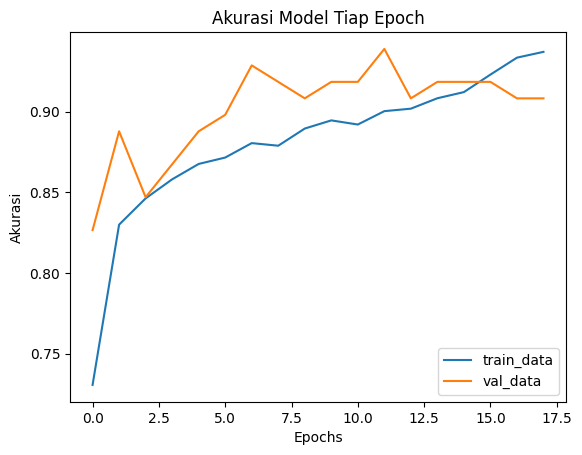

In [18]:
# Plot akurasi model
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Akurasi Model Tiap Epoch")
plt.xlabel("Epochs")
plt.ylabel("Akurasi")
plt.legend(["train_data","val_data"],loc="lower right")

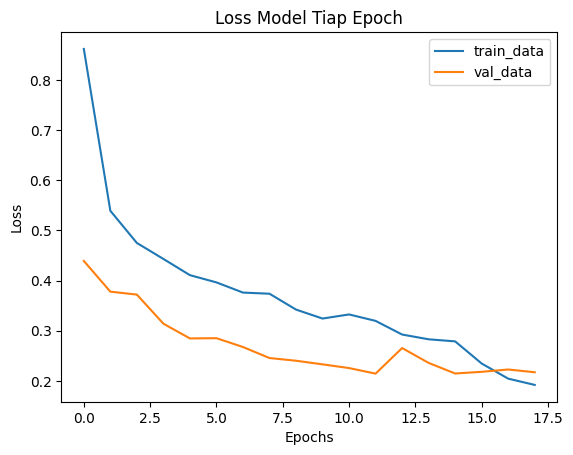

In [19]:
# Plot loss model
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Loss Model Tiap Epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["train_data","val_data"],loc="upper right")

## **Save the Model**

In [20]:
model_dir = "tflite_model/"
tf.saved_model.save(model,model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(model_dir)
tflite_model = converter.convert()

tflite_model_file = pathlib.Path("flower.tflite")
tflite_model_file.write_bytes(tflite_model)

12030528

In [21]:
# Melihat ukuran model

tflite_size = len(tflite_model) / (1024 * 1024)
print('TFLite model size = %d MBs.' % tflite_size)

TFLite model size = 11 MBs.


## **Conclusion**

Model yang telah dibuat menggunakan metode Transfer Learning dengan arsitektur MobileNetV2 menghasilkan akurasi pada data train sebesar 90.02% dan akurasi pada data validasi sebesar 93.88%. Akurasi yang lebih besar mungkin bisa didapatkan dengan menggunakan arsitektur yang lain atau dengan proses hyperparameter tuning pada arsitektur MobileNetV2. Model ini dapat digunakan untuk mengklasifikan 14 jenis bunga dan dengan disimpan ke dalam format TF-Lite, model dapat di-deploy ke dalam mobile device.

## **Daftar Referensi**

[1] 	E. Palupi, Syafrizal and N. Hariani, "Studi Morfologi Polen Tanaman Pekarangan di Perumahan Gn. Dubbs Balikpapan," Bioprospek, pp. 16-21, 2018.

[2] 	A. G. Howard et al., “MobileNets: Efficient Convolutional Neural Networks for Mobile Vision Applications.” arXiv, 2017. doi: 10.48550/ARXIV.1704.04861.
